In [19]:
import gc
import torch
from torchvision import models
import matplotlib.pyplot as plt

from profiler.cpu import CPU
from profiler.cuda import CUDA

from dataset.imagenet import preprocess_data, validate_accuracy

PATH = "C:\\Users\\Sejio27\\Documents\\GitHub\\Edge_Profiler\\.model"
DATA_PATH = "C:\\Users\\Sejio27\\Documents\\GitHub\\Edge_Profiler\\.data"

In [38]:
records = {}
batch_size = 256
image_sizes = [(224,224), (192,192), (160, 160), (112,112)]

def evaluate_accuracy(model, batch_size, image_sizes):
    top1_records, top5_records = [], []
    
    for image_size in image_sizes:
        print(image_size)
        dataloader = preprocess_data(DATA_PATH, batch_size, image_size)
        top1, top5 = validate_accuracy(model, dataloader)
        top1_records.append(top1.item())
        top5_records.append(top5.item())

    return top1_records, top5_records

In [35]:
# model_files = ['resnet50.pt', 'resnet50_pruned_025.pt', 'resnet50_pruned_052.pt']
model_files = ['resnet50_pruned_052.pt']
for model_file in model_files:

    model = torch.load(f"{PATH}\\{model_file}")
    print(model_file)

    top1, top5 = evaluate_accuracy(model, batch_size, image_sizes)
    records[model_file] = (top1, top5)
    
    gc.collect()
    torch.cuda.empty_cache()
records

resnet50_pruned_052.pt
(224, 224)


Validating..: 100%|██████████| 196/196 [01:49<00:00,  1.78it/s]


Top-1 Accuracy on ImageNet validation set: 71.03%
Top-5 Accuracy on ImageNet validation set: 89.84%
(192, 192)


Validating..: 100%|██████████| 196/196 [01:41<00:00,  1.94it/s]


Top-1 Accuracy on ImageNet validation set: 68.83%
Top-5 Accuracy on ImageNet validation set: 88.11%
(160, 160)


Validating..: 100%|██████████| 196/196 [01:32<00:00,  2.12it/s]


Top-1 Accuracy on ImageNet validation set: 64.63%
Top-5 Accuracy on ImageNet validation set: 85.04%
(112, 112)


Validating..: 100%|██████████| 196/196 [01:23<00:00,  2.34it/s]


Top-1 Accuracy on ImageNet validation set: 51.67%
Top-5 Accuracy on ImageNet validation set: 74.01%


{'resnet50.pt': ([80.09606170654297,
   78.99991607666016,
   77.00653839111328,
   68.75],
  [95.22640228271484,
   94.62571716308594,
   93.28483581542969,
   88.17442321777344]),
 'resnet50_pruned_025.pt': ([75.26306915283203,
   73.31393432617188,
   70.04463958740234,
   58.51841354370117],
  [92.40393829345703,
   91.14835357666016,
   88.79304504394531,
   80.06775665283203]),
 'resnet50_pruned_052.pt': ([71.02678680419922,
   68.82613372802734,
   64.63288879394531,
   51.673309326171875],
  [89.83816528320312,
   88.10785675048828,
   85.04065704345703,
   74.00629425048828])}

In [39]:
records = {'resnet50.pt': ([80.09606170654297,
   78.99991607666016,
   77.00653839111328,
   68.75],
  [95.22640228271484,
   94.62571716308594,
   93.28483581542969,
   88.17442321777344]),
 'resnet50_pruned_025.pt': ([75.26306915283203,
   73.31393432617188,
   70.04463958740234,
   58.51841354370117],
  [92.40393829345703,
   91.14835357666016,
   88.79304504394531,
   80.06775665283203]),
 'resnet50_pruned_052.pt': ([71.02678680419922,
   68.82613372802734,
   64.63288879394531,
   51.673309326171875],
  [89.83816528320312,
   88.10785675048828,
   85.04065704345703,
   74.00629425048828])}

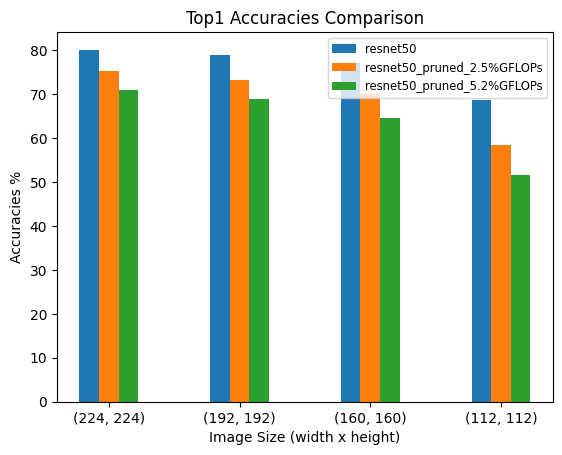

In [47]:
# Plotting
models = ['resnet50.pt', 'resnet50_pruned_025.pt', 'resnet50_pruned_052.pt']
x_axis = [str(x) for x in image_sizes]

top1_acc, top5_acc = [], []
for m in models:
    top1_acc.append(records[m][0])
    top5_acc.append(records[m][1])

fig, ax = plt.subplots()

ax.bar([x - 0.15 for x in range(len(x_axis))], top1_acc[0], width=0.15, label='resnet50')
ax.bar(x_axis, top1_acc[1], width=0.15, label='resnet50_pruned_2.5%GFLOPs')
ax.bar([x + 0.15 for x in range(len(x_axis))], top1_acc[2], width=0.15, label='resnet50_pruned_5.2%GFLOPs')
ax.set_xlabel('Image Size (width x height)')
ax.set_ylabel('Accuracies %')
ax.set_title('Top1 Accuracies Comparison')
ax.legend(fontsize='small')
plt.show()

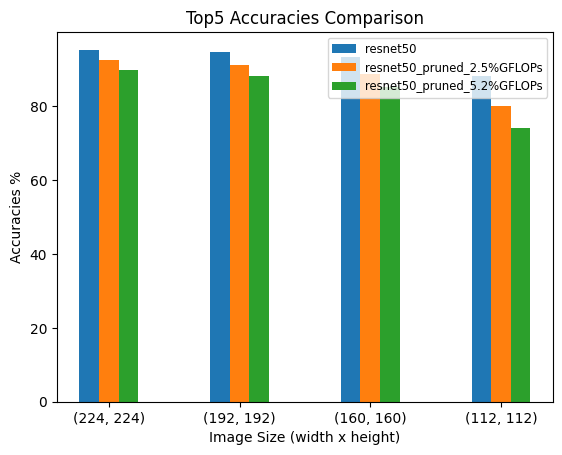

In [46]:
# Plotting
# models = ['resnet50.pt', 'resnet50_pruned_025.pt', 'resnet50_pruned_052.pt']
x_axis = [str(x) for x in image_sizes]

top1_acc, top5_acc = [], []
for m in models:
    top1_acc.append(records[m][0])
    top5_acc.append(records[m][1])

fig, ax = plt.subplots()

ax.bar([x - 0.15 for x in range(len(x_axis))], top5_acc[0], width=0.15, label='resnet50')
ax.bar(x_axis, top5_acc[1], width=0.15, label='resnet50_pruned_2.5%GFLOPs')
ax.bar([x + 0.15 for x in range(len(x_axis))], top5_acc[2], width=0.15, label='resnet50_pruned_5.2%GFLOPs')
ax.set_xlabel('Image Size (width x height)')
ax.set_ylabel('Accuracies %')
ax.set_title('Top5 Accuracies Comparison')
ax.legend(fontsize='small')
plt.show()